In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import sounddevice as sd

In [4]:
# Step 1: Define the parameters

# Number of microphones
M = 3

# Order of Ambisonics
P = 4  # You can change this according to your needs

triangle_side = 6

# Constants for the attenuation function
volume_threshold = 0.9
volume_range = 0.9
hoa_threshold = 0.9
hoa_range = 1.3

# Define the attenuation coefficient function a_p(d_m)
def l(d):
    return volume_threshold * (1 - volume_range * d)

def k_p(d):
    return hoa_threshold * (1 - hoa_range * d)

def a_p(d):
    return 10 ** ((l(d) + k_p(d)) / 20)

def compute_distance(interp_point, mic_number, triangle_side):
    # Microphone positions in the equilateral triangle
    mic_positions = np.zeros((3, 2))
    mic_positions[0, :] = [0, 0]
    mic_positions[1, :] = [triangle_side, 0]
    mic_positions[2, :] = [triangle_side / 2, (triangle_side * np.sqrt(3)) / 2]
    
    # Euclidean distance between the interpolation point and the microphone
    distance = np.linalg.norm(interp_point - mic_positions[mic_number, :])
    
    return distance

In [ ]:
# Step 2: Load your ambisonic signals y_m_p(n) from WAV files
path_to_files = '/Users/prerna/Documents/spatial_audio/data/'
file_names = ['mic1.wav', 'mic2.wav', 'mic3.wav']  # Adjust with your file names

# Initialize an array to store ambisonic signals
max_samples = max([wavfile.read(path_to_files + file_name)[1].shape[0] for file_name in file_names])
y_m_p = np.zeros((M, P, max_samples))  # Initialize with the maximum number of samples

for m in range(M):
    # Read the WAV file
    fs, y = wavfile.read(path_to_files + file_names[m])
    
    # Take the first 4 channels (assuming each mic produces 4 channels)
    y_m_p[m, :, :y.shape[0]] = y[:, :P].T

# Step 3: Implement the interpolation algorithm

# Number of samples
N = y_m_p.shape[2]

# Initialize the interpolated signal
x_p = np.zeros(N)

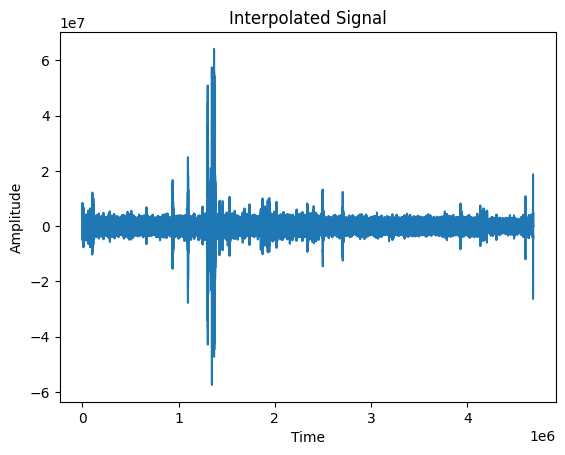

In [8]:
# Interpolation point coordinates (you need to specify the interpolation point)
interp_point = [triangle_side / 2, (triangle_side * np.sqrt(3)) / 6]  # Replace with the actual coordinates

# Loop over time samples
for n in range(N):
    # Loop over Ambisonic components
    for p in range(P):
        # Compute the attenuation coefficient for each microphone
        for m in range(M):
            # Replace this line with your actual distance calculation
            d_m = compute_distance(interp_point, m, triangle_side) 
            # Update the interpolated signal using the distance attenuation formula
            x_p[n] += a_p(d_m) * y_m_p[m, p, n]

# Step 4: Plot
# Replace this with your visualization code based on the requirements of your application
time_axis = np.arange(1, N + 1)
plt.plot(time_axis, x_p)
plt.title('Interpolated Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()


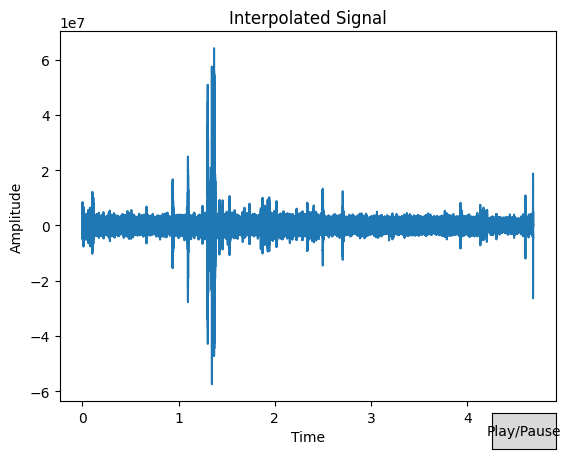

In [11]:
# Step 4: Plot with play and pause buttons
fig, ax = plt.subplots()
line, = ax.plot(time_axis, x_p)
ax.set_title('Interpolated Signal')
ax.set_xlabel('Time')
ax.set_ylabel('Amplitude')

# Add play and pause buttons
play_pause_ax = plt.axes([0.8, 0.01, 0.1, 0.075])
play_pause_button = plt.Button(play_pause_ax, 'Play/Pause', hovercolor='0.975')

# Callback function for play/pause button
is_playing = [False]
def play_pause_callback(event):
    is_playing[0] = not is_playing[0]
    if is_playing[0]:
        sd.play(x_p, fs)
        play_pause_button.label.set_text('Pause')
    else:
        sd.stop()
        play_pause_button.label.set_text('Play')

play_pause_button.on_clicked(play_pause_callback)

plt.show()